In [1]:
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def supmod1_gen(N:int):
    A = np.random.rand(N,N)
    x = np.random.rand(N)
    in_dat = open('input_data_'+str(N)+'.txt','w')
    sA = '\n'.join([' '.join([str(A[i][j]) for j in range(N)]) for i in range(N)])
    sX = ' '.join([str(x[j]) for j in range(N)])
    in_dat.write(str(N)+'\n')
    in_dat.write(sA+'\n')
    in_dat.write(sX)
    in_dat.close()
    print(f'Матрица {N}x{N} и вектор длины {N} сгенерированы')

In [38]:
for N in [10, 20, 50, 75, 100, 200, 500, 750, 1000]:
    supmod1_gen(N)

Матрица 10x10 и вектор длины 10 сгенерированы
Матрица 20x20 и вектор длины 20 сгенерированы
Матрица 50x50 и вектор длины 50 сгенерированы
Матрица 75x75 и вектор длины 75 сгенерированы
Матрица 100x100 и вектор длины 100 сгенерированы
Матрица 200x200 и вектор длины 200 сгенерированы
Матрица 500x500 и вектор длины 500 сгенерированы
Матрица 750x750 и вектор длины 750 сгенерированы
Матрица 1000x1000 и вектор длины 1000 сгенерированы


In [6]:
for N in [300, 400, 600, 800, 900, 2000]:
    supmod1_gen(N)

Матрица 300x300 и вектор длины 300 сгенерированы
Матрица 400x400 и вектор длины 400 сгенерированы
Матрица 600x600 и вектор длины 600 сгенерированы
Матрица 800x800 и вектор длины 800 сгенерированы
Матрица 900x900 и вектор длины 900 сгенерированы
Матрица 2000x2000 и вектор длины 2000 сгенерированы


# Графики

In [2]:
def get_d(f, fmt=None):
    data = []
    N = int(str(f).split('.')[0].split('_')[-1])
    data.append(N)
    f_str = open(f)
    if fmt == 'py':
        coords = [1, 1]
    else:
        coords = [1, 2]
    for i, line in enumerate(f_str):
        ls = line.split()
        data.append(float(ls[coords[i]]))
    f_str.close()
    return data

Text(0.5, 0, 'длина вектора N')

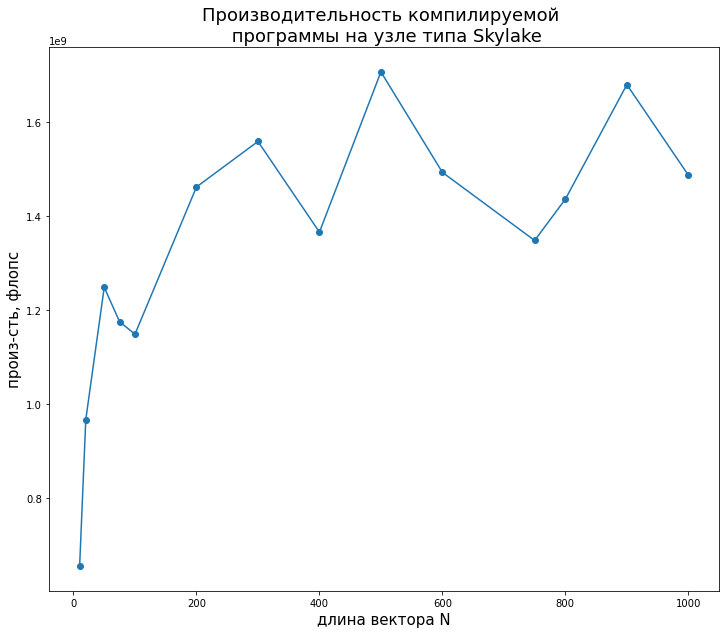

In [6]:
files = list(Path.cwd().glob('*1_*.txt'))
dataset = []
for f in files:
    d0 = get_d(f)
    dataset.append(d0)
data = pd.DataFrame(dataset, columns=['N', 'time', 'result'])
data.sort_values(by=['N'], inplace=True)
data['flop'] = data['N'].apply(lambda x: 2 * x **2 + 2 * x)
data['flop_s'] = data['flop'] / data['time'] * 1000
fig, ax = plt.subplots(1,1, figsize=(12,10))
plt.plot('N', 'flop_s', 'o-', data=data);
plt.title('Производительность компилируемой \n программы на узле типа Skylake', fontsize=18)
ax.set_ylabel('произ-сть, флопc',fontsize=15)
ax.set_xlabel('длина вектора N',fontsize=15)
#plt.savefig('flops_cpp.png')

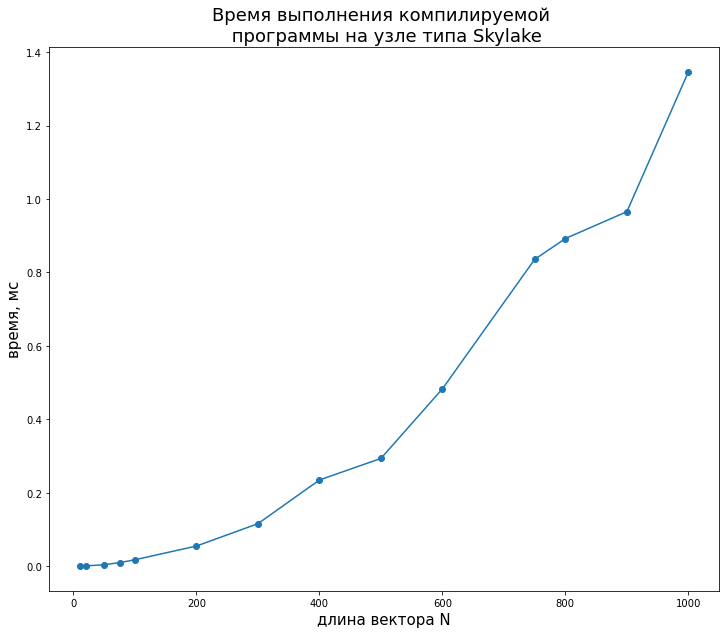

In [7]:
fig, ax = plt.subplots(1,1, figsize=(12,10))
plt.plot('N', 'time', 'o-', data=data);
plt.title('Время выполнения компилируемой \n программы на узле типа Skylake', fontsize=18)
ax.set_ylabel('время, мс',fontsize=15)
ax.set_xlabel('длина вектора N',fontsize=15)
#plt.savefig('time_cpp.png')

In [3]:
data

,N,time,result,flop,flop_s
0,10,0.000336,11.431998,220,6.555032e+08
3,20,0.000868,102.459379,840,9.673318e+08
5,50,0.004084,453.539260,5100,1.248743e+09
7,75,0.009699,962.655370,11400,1.175377e+09
1,100,0.017581,1466.997564,20200,1.148995e+09
4,200,0.054986,5898.474755,80400,1.462180e+09
6,500,0.293490,41847.051333,501000,1.707044e+09
8,750,0.835446,92544.258389,1126500,1.348382e+09
2,1000,1.345969,172378.227854,2002000,1.487405e+09


Text(0.5, 0, 'длина вектора N')

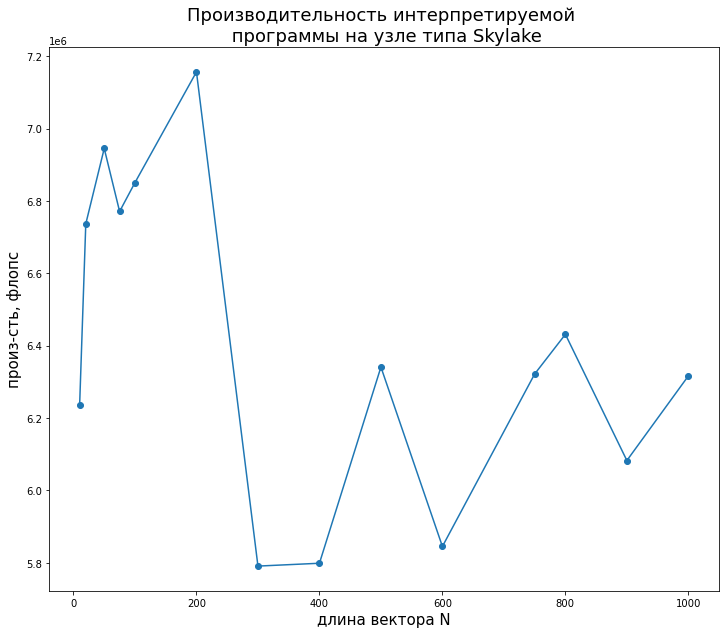

In [8]:
files = list(Path.cwd().glob('*1py*.txt'))
dataset = []
for f in files:
    d0 = get_d(f, 'py')
    dataset.append(d0)
data = pd.DataFrame(dataset, columns=['N', 'time', 'result'])
data.sort_values(by=['N'], inplace=True)
data['flop'] = data['N'].apply(lambda x: 2 * x **2 + 2 * x)
data['flop_s'] = data['flop'] / data['time'] * 1000
fig, ax = plt.subplots(1,1, figsize=(12,10))
plt.plot('N', 'flop_s', 'o-', data=data);
plt.title('Производительность интерпретируемой \n программы на узле типа Skylake', fontsize=18)
ax.set_ylabel('произ-сть, флопc',fontsize=15)
ax.set_xlabel('длина вектора N',fontsize=15)
#plt.savefig('flops_py.png')

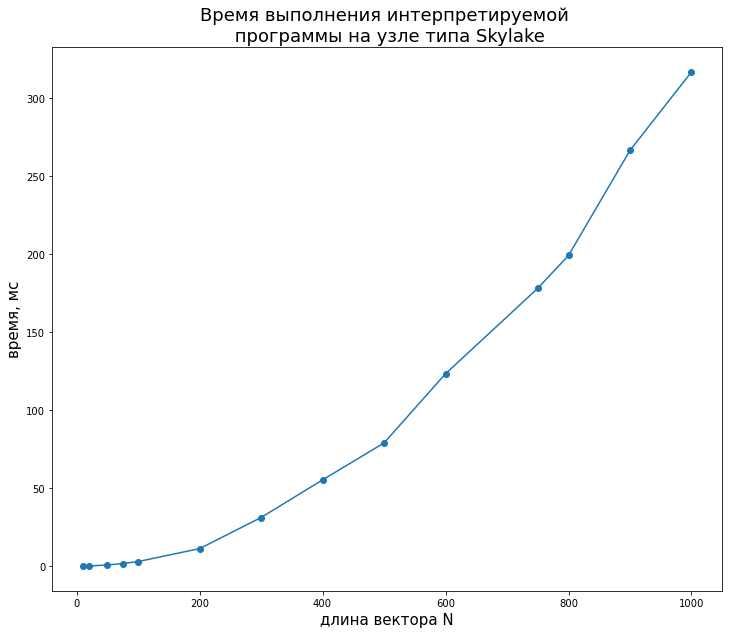

In [9]:
fig, ax = plt.subplots(1,1, figsize=(12,10))
plt.plot('N', 'time', 'o-', data=data);
plt.title('Время выполнения интерпретируемой \n программы на узле типа Skylake', fontsize=18)
ax.set_ylabel('время, мс',fontsize=15)
ax.set_xlabel('длина вектора N',fontsize=15)
#plt.savefig('time_py.png')

# Cython

In [4]:
!python setup.py build_ext --inplace

Compiling quad_form.pyx because it changed.
[1/1] Cythonizing quad_form.pyx
running build_ext
building 'quad_form' extension


C:\Users\user\miniconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\user\Documents\GitHub\Study_3\СупМод\Лр_1\quad_form.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/


In [7]:
!python cy_variant1.py

Traceback (most recent call last):
  File "cy_variant1.py", line 2, in <module>
    import quad_form
ModuleNotFoundError: No module named 'quad_form'


In [8]:
files = list(Path.cwd().glob('*1cy*.txt'))
files

[WindowsPath('C:/Users/Admin/Documents/Github/Study_3/СупМод/Лр_1/Supmod_1cy_10.txt'),
 WindowsPath('C:/Users/Admin/Documents/Github/Study_3/СупМод/Лр_1/Supmod_1cy_100.txt'),
 WindowsPath('C:/Users/Admin/Documents/Github/Study_3/СупМод/Лр_1/Supmod_1cy_1000.txt'),
 WindowsPath('C:/Users/Admin/Documents/Github/Study_3/СупМод/Лр_1/Supmod_1cy_20.txt'),
 WindowsPath('C:/Users/Admin/Documents/Github/Study_3/СупМод/Лр_1/Supmod_1cy_200.txt'),
 WindowsPath('C:/Users/Admin/Documents/Github/Study_3/СупМод/Лр_1/Supmod_1cy_300.txt'),
 WindowsPath('C:/Users/Admin/Documents/Github/Study_3/СупМод/Лр_1/Supmod_1cy_400.txt'),
 WindowsPath('C:/Users/Admin/Documents/Github/Study_3/СупМод/Лр_1/Supmod_1cy_50.txt'),
 WindowsPath('C:/Users/Admin/Documents/Github/Study_3/СупМод/Лр_1/Supmod_1cy_500.txt'),
 WindowsPath('C:/Users/Admin/Documents/Github/Study_3/СупМод/Лр_1/Supmod_1cy_600.txt'),
 WindowsPath('C:/Users/Admin/Documents/Github/Study_3/СупМод/Лр_1/Supmod_1cy_75.txt'),
 WindowsPath('C:/Users/Admin/Docume

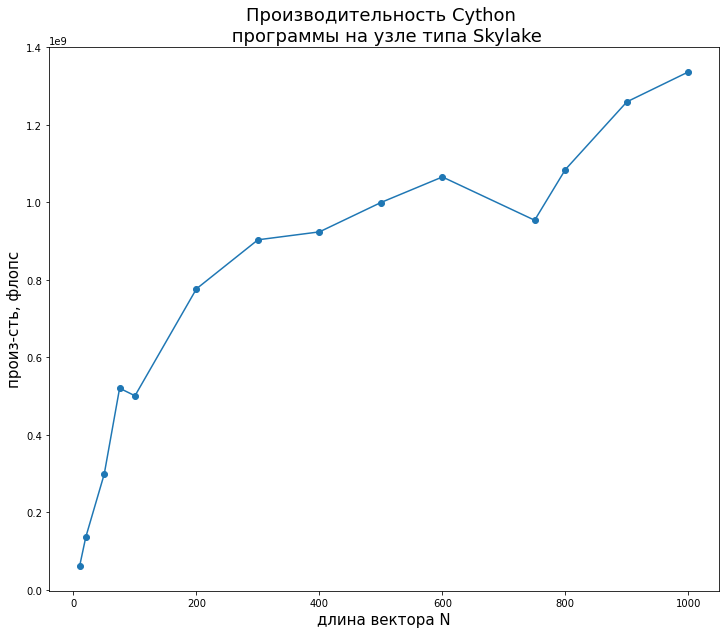

In [13]:
files = list(Path.cwd().glob('*1cy*.txt'))
dataset = []
for f in files:
    d0 = get_d(f, 'py')
    dataset.append(d0)
data = pd.DataFrame(dataset, columns=['N', 'time', 'result'])
data.sort_values(by=['N'], inplace=True)
data['flop'] = data['N'].apply(lambda x: 2 * x **2 + 2 * x)
data['flop_s'] = data['flop'] / data['time'] * 1000
fig, ax = plt.subplots(1,1, figsize=(12,10))
plt.plot('N', 'flop_s', 'o-', data=data);
plt.title('Производительность Cython \n программы на узле типа Skylake', fontsize=18)
ax.set_ylabel('произ-сть, флопc',fontsize=15)
ax.set_xlabel('длина вектора N',fontsize=15)
plt.savefig('flops_cy.png')

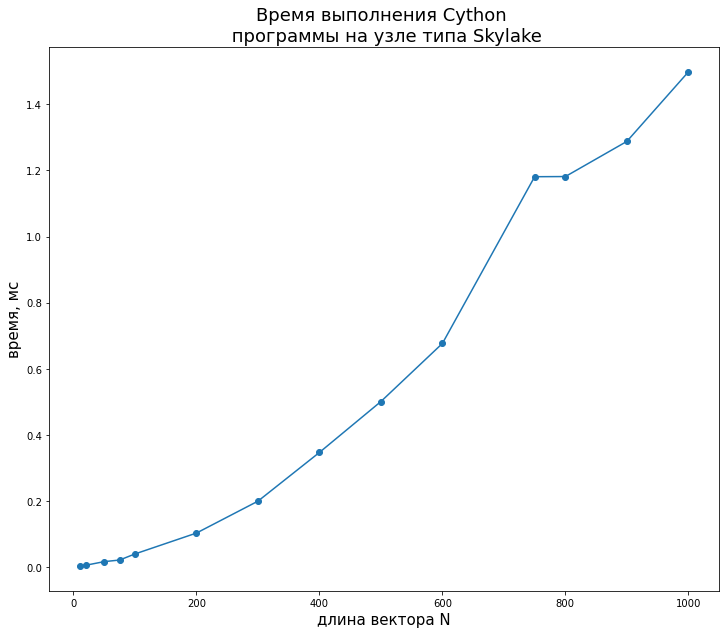

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12,10))
plt.plot('N', 'time', 'o-', data=data);
plt.title('Время выполнения Cython \n программы на узле типа Skylake', fontsize=18)
ax.set_ylabel('время, мс',fontsize=15)
ax.set_xlabel('длина вектора N',fontsize=15)
plt.savefig('time_cy.png')

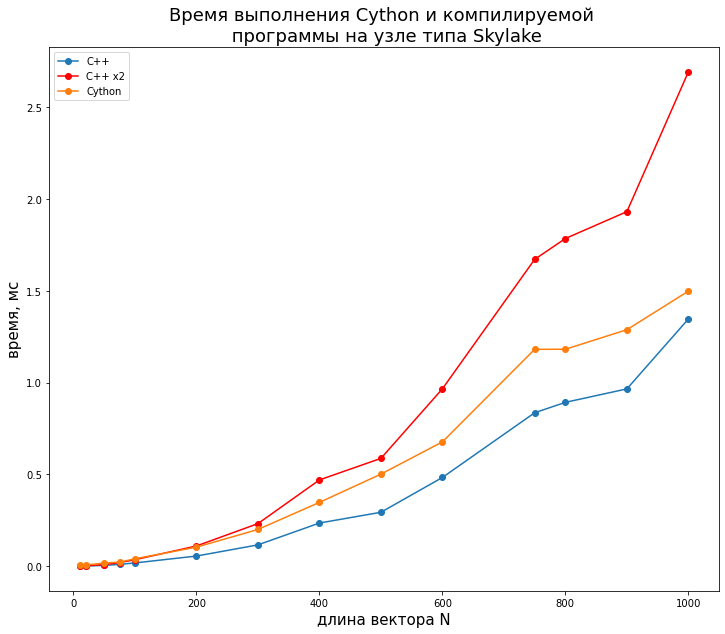

In [3]:
files = list(Path.cwd().glob('*1_*.txt'))
dataset = []
for f in files:
    d0 = get_d(f)
    dataset.append(d0)
data = pd.DataFrame(dataset, columns=['N', 'time', 'result'])
data.sort_values(by=['N'], inplace=True)
data['flop'] = data['N'].apply(lambda x: 2 * x **2 + 2 * x)
data['flop_s'] = data['flop'] / data['time'] * 1000
data['time_x2'] = data['time'] * 2
fig, ax = plt.subplots(1,1, figsize=(12,10))


plt.plot('N', 'time', 'o-', data=data, label='C++');
plt.plot('N', 'time_x2', 'ro-', data=data, label='C++ x2');

ax.set_ylabel('время, мс',fontsize=15)
ax.set_xlabel('длина вектора N',fontsize=15)

files = list(Path.cwd().glob('*1cy*.txt'))
dataset = []
for f in files:
    d0 = get_d(f, 'py')
    dataset.append(d0)
data = pd.DataFrame(dataset, columns=['N', 'time', 'result'])
data.sort_values(by=['N'], inplace=True)
data['flop'] = data['N'].apply(lambda x: 2 * x **2 + 2 * x)
data['flop_s'] = data['flop'] / data['time'] * 1000

plt.plot('N', 'time', 'o-', data=data, label='Cython');
plt.title('Время выполнения Cython и компилируемой \n программы на узле типа Skylake', fontsize=18)
plt.legend()
plt.savefig('time_cpp_vs_cy.png')